Simple 2D modelling accoustic finite difference using stagerred grid.

Currently the source is limited to monopole accoustic pressure and the scheme is only for accoustic.

Written by: La Ode Marzujriban Masfara
email : l.o.m.masfara@tudelft.nl or laode.marzujriban@rwth-aachen.de


In [1]:
pip install tqdm scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import all necessary module
import warnings
from scipy.signal import butter, lfilter, freqz
import scipy.integrate as it
warnings.filterwarnings('ignore')
from scipy.io import loadmat
from source import*
import matplotlib.gridspec as gridspec
import numpy as np
from tqdm import tqdm
import math
from scipy import fftpack
import matplotlib.pyplot as plt


In [3]:
#load data
annots = loadmat('velocity.mat')
velocity = annots['vel']
velocity = velocity*1000


#load data
nny = len(velocity[1]) 
nnx = len(velocity[0]) 

In [4]:
#define velocity density and spacing
dx = 10
density = 1500

#name the project for1
for1   = forward(velocity,density,dx)

#call FDpar() to show FD parameter recomendation
for1.FDpar()

FD parameters:
|fc  | dominant frequency of ricker wavelet = 9.150000 Hz
|fmax| maximum frequency of our data        = 30.500000 Hz
|dt  | maximum sampling time                = 0.000829 s


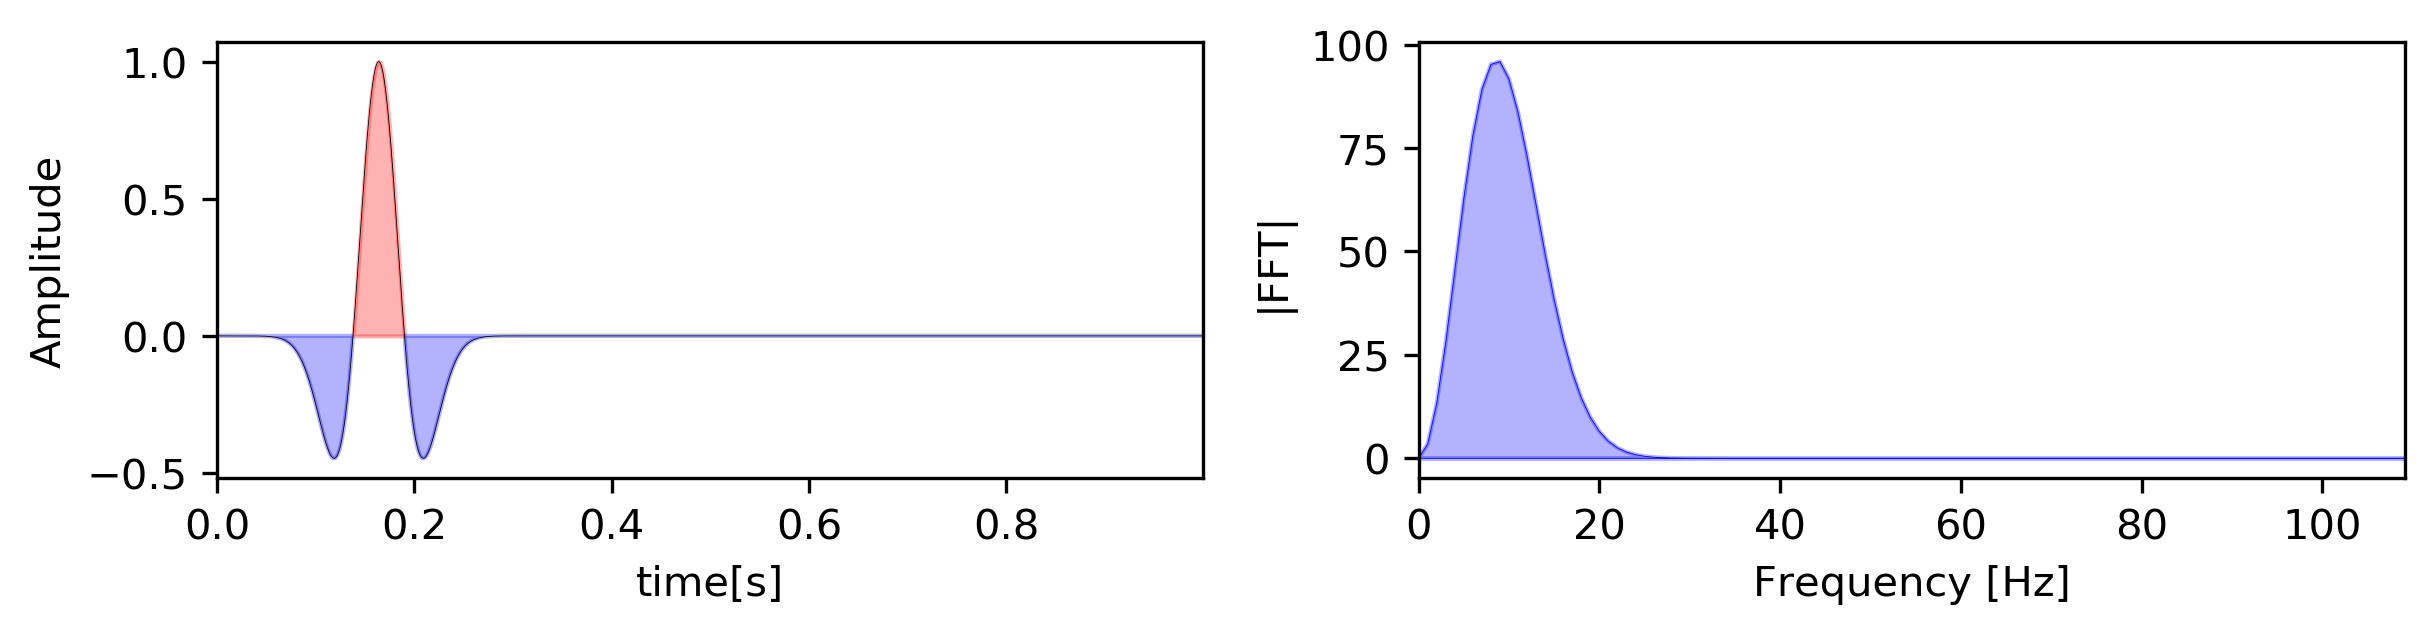

In [5]:
#define ricker source based on the above parameters 
# t is the time axis ; 
# s is the amplitude ;
# so you can plot plt.plot(t,s) or put plot = true in the source.ricker module
%matplotlib inline
dt = 0.0005
nt = 2000
fc = 9.15
t,s= sources(dt,nt, fc).ricker(a=4,plot=True)

In [6]:
#add PML to the velocity model
npml   = 100
cpml   = for1.pml(npml)

#apply absorbing boundary condition to the PML
for1.ApplyPML(1,1)

--- > 100 points are added to all sides
--- > absorbing boundaries applied to PML
--- > PML factor = 1.000  |   PML exponent = 1.000


In [7]:
#geometry 
sx = 300
sy = 20

#set receiver location
rex,rez   = np.linspace(300,490,20,dtype=int),np.linspace(100,290,20,dtype=int)
recx,recz = np.meshgrid(rex,rez); recx = np.ravel(recx); recz = np.ravel(recz)

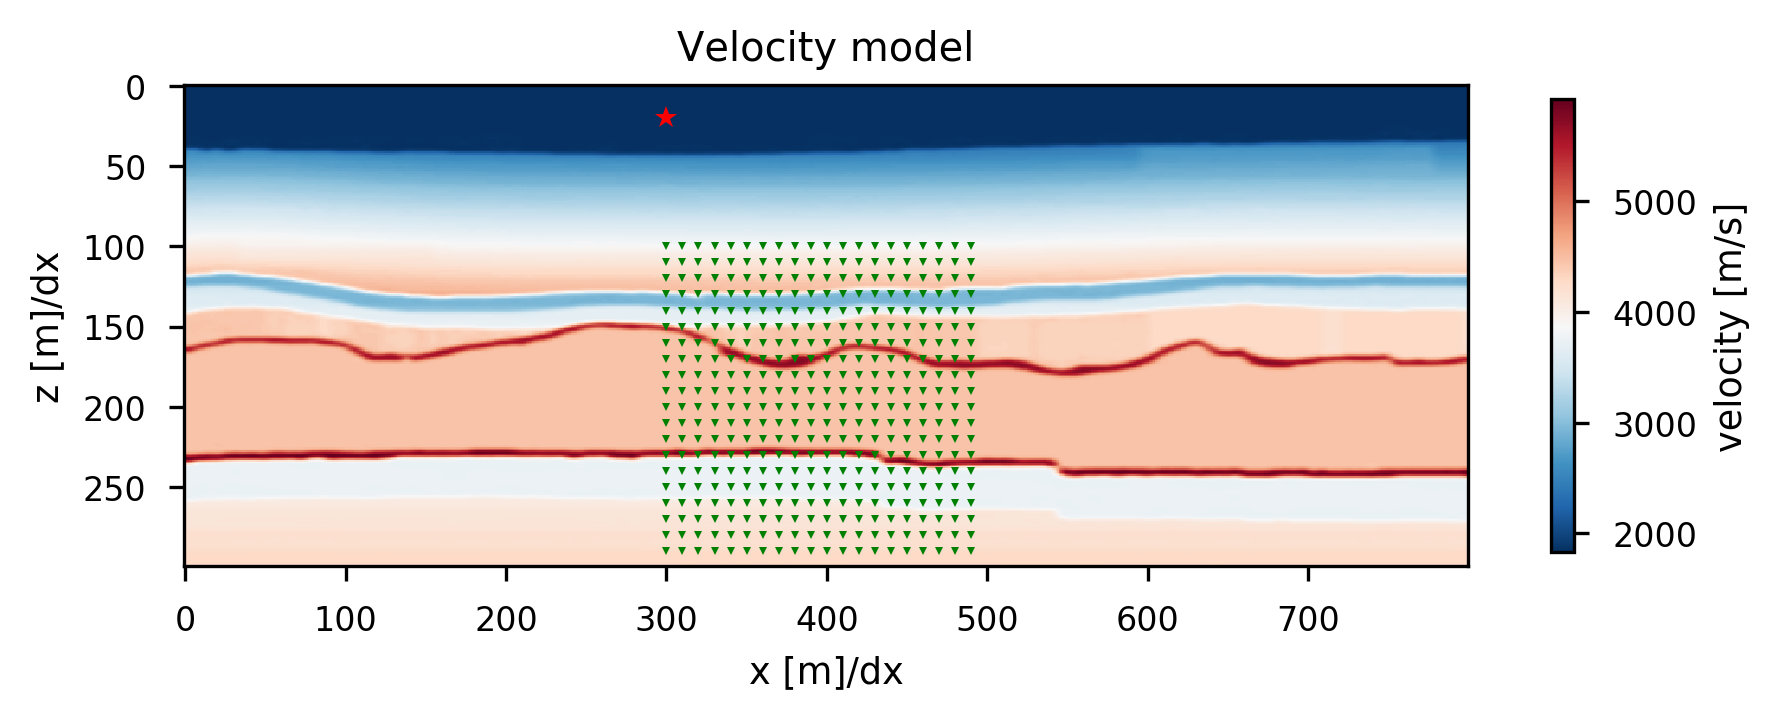

In [8]:
#plot the setup
%matplotlib inline
for1.plotmodel(sx,sy,recx,recz)

In [10]:
#run the setup
#to be able to show the movie add '%matplotlib notebook' before the solve module and set plotmov to 'True'
#to make plotted images appear inline add '%matplotlib inline'
%matplotlib notebook 
res = for1.solve(recx,recz,sx,sy,t,s,plotmov=False)
%matplotlib inline 

100%|██████████| 1999/1999 [02:27<00:00, 13.59it/s]


In [11]:
#list the results of the forward simmulation 
#Vx is horizontal particel velocity and Vxx is the derivative of Vx in x direction
list(res)

['Px', 'Py', 'Ptot', 'Vx', 'Vy', 'Vxx', 'Vxy', 'Vyy', 'Vyx']

In [51]:
#plot
plt.figure(figsize=(15,15),dpi=600)
plt.subplot(331)
plt.imshow(res['Ptot'][:,0:20],aspect='auto',cmap='binary',extent=[0.5,20.5,t[-1],t[0]])
plt.ylabel('t[s]')
plt.xticks(np.arange(1,21,5))
plt.xlabel('receiver number line 1')
plt.title('P total')

plt.subplot(332)
plt.imshow(res['Px'][:,0:20],aspect='auto',cmap='binary',extent=[0.5,20.5,t[-1],t[0]])
plt.ylabel('t[s]')
plt.xlabel('receiver number line 1')
plt.xticks(np.arange(1,21,5))
plt.title('Px')

plt.subplot(333)
plt.imshow(res['Py'][:,0:20],aspect='auto',cmap='binary',extent=[0.5,20.5,t[-1],t[0]])
plt.ylabel('t[s]')
plt.xlabel('receiver number line 1')
plt.xticks(np.arange(1,21,5))
plt.title('Py')

plt.subplot(334)
plt.imshow(res['Vx'][:,0:20],aspect='auto',cmap='binary',extent=[0.5,20.5,t[-1],t[0]])
plt.ylabel('t[s]')
plt.xlabel('receiver number line 1')
plt.xticks(np.arange(1,21,5))
plt.title('Vx')

plt.subplot(335)
plt.imshow(res['Vy'][:,0:20],aspect='auto',cmap='binary',extent=[0.5,20.5,t[-1],t[0]])
plt.ylabel('t[s]')
plt.xticks(np.arange(1,21,5))
plt.xlabel('receiver number line 1')
plt.title('Vy')

plt.subplot(336)
plt.imshow(res['Vxx'][:,0:20],aspect='auto',cmap='binary',extent=[0.5,20.5,t[-1],t[0]])
plt.ylabel('t[s]')
plt.xticks(np.arange(1,21,5))
plt.xlabel('receiver number line 1')
plt.title('Vxx')

plt.subplot(337)
plt.imshow(res['Vxy'][:,0:20],aspect='auto',cmap='binary',extent=[0.5,20.5,t[-1],t[0]])
plt.ylabel('t[s]')
plt.xticks(np.arange(1,21,5))
plt.xlabel('receiver number line 1')
plt.title('Vxy')

plt.subplot(338)
plt.imshow(res['Vyx'][:,0:20],aspect='auto',cmap='binary',extent=[0.5,20.5,t[-1],t[0]])
plt.ylabel('t[s]')
plt.xticks(np.arange(1,21,5))
plt.xlabel('receiver number line 1')
plt.title('Vyx')

plt.subplot(339)
plt.imshow(res['Vyy'][:,0:20],aspect='auto',cmap='binary',extent=[0.5,20.5,t[-1],t[0]])
plt.ylabel('t[s]')
plt.xticks(np.arange(1,21,5))
plt.xlabel('receiver number line 1')
plt.title('Vyy')

plt.savefig('allres.png')
plt.show()

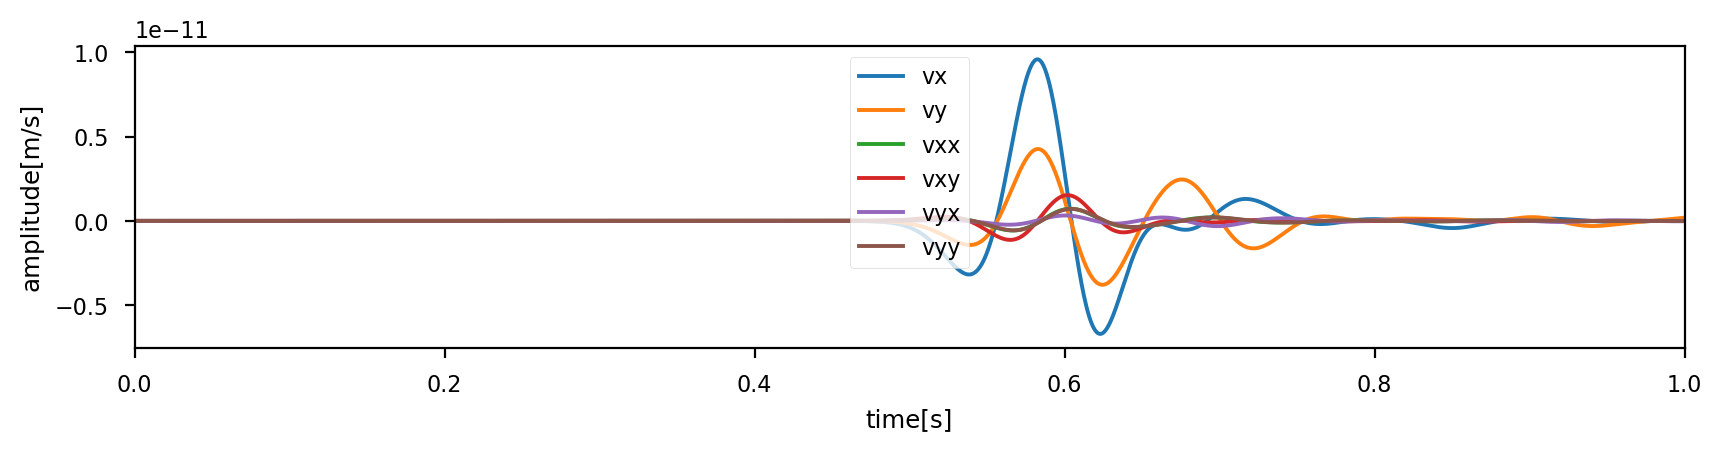

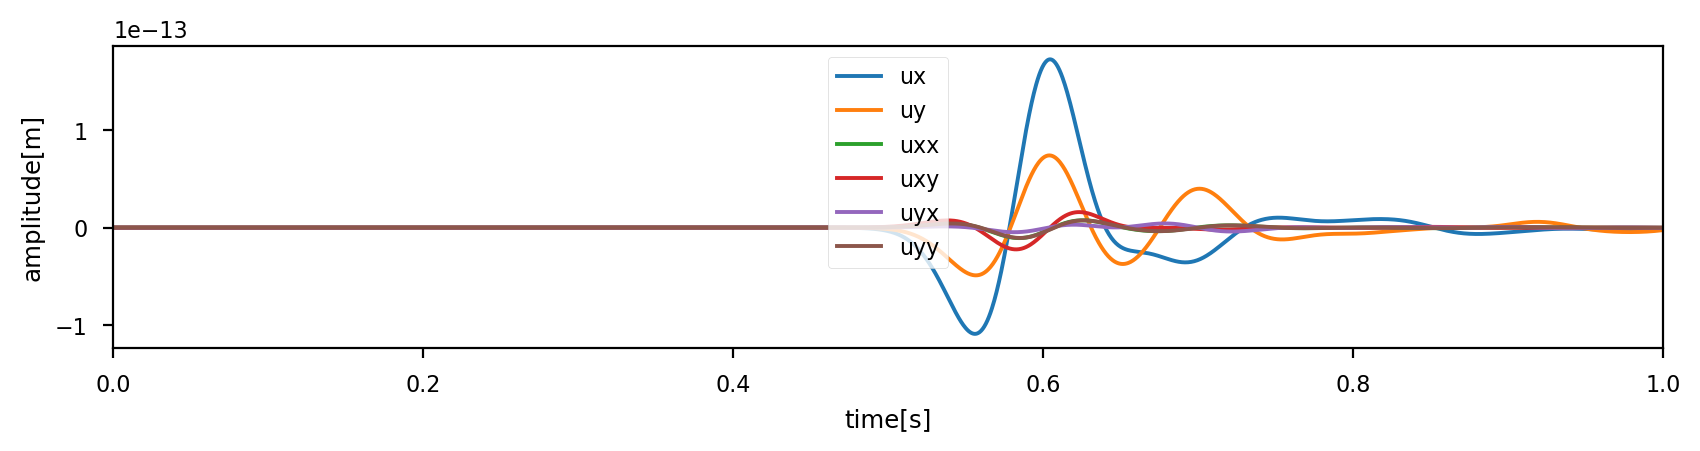

In [52]:
#select 1 trace to plot
num = 8
vx = res['Vx'][:,num]
vxx = res['Vxx'][:,num]
vxy = res['Vxy'][:,num]

ux = it.cumtrapz(vx, t);ux = np.append(0,ux) 
uxx = it.cumtrapz(vxx, t);uxx = np.append(0,uxx) 
uxy = it.cumtrapz(vxy, t);uxy = np.append(0,uxy) 

vy = res['Vy'][:,num]
vyy = res['Vyy'][:,num]
vyx = res['Vyx'][:,num]

uy = it.cumtrapz(vy, t);uy = np.append(0,uy) 
uyy = it.cumtrapz(vyy, t);uyy = np.append(0,uyy) 
uyx = it.cumtrapz(vyx, t);uyx = np.append(0,uyx) 

%matplotlib inline

plt.figure(figsize=(10,2),dpi=200)
plt.plot(t,vx,label='vx')
plt.plot(t,vy,label='vy')

plt.plot(t,vxx,label='vxx')
plt.plot(t,vxy,label='vxy')
plt.plot(t,vyx,label='vyx')
plt.plot(t,vyy,label='vyy')
plt.xlim(0,1)
plt.xlabel('time[s]')
plt.ylabel('amplitude[m/s]')
plt.legend()
plt.show()



plt.figure(figsize=(10,2),dpi=200)
plt.plot(t,ux,label='ux')
plt.plot(t,uy,label='uy')
plt.plot(t,uxx,label='uxx')
plt.plot(t,uxy,label='uxy')
plt.plot(t,uyx,label='uyx')
plt.plot(t,uyy,label='uyy')
plt.xlabel('time[s]')
plt.ylabel('amplitude[m]')

plt.legend()
plt.xlim(0,1)
plt.show()

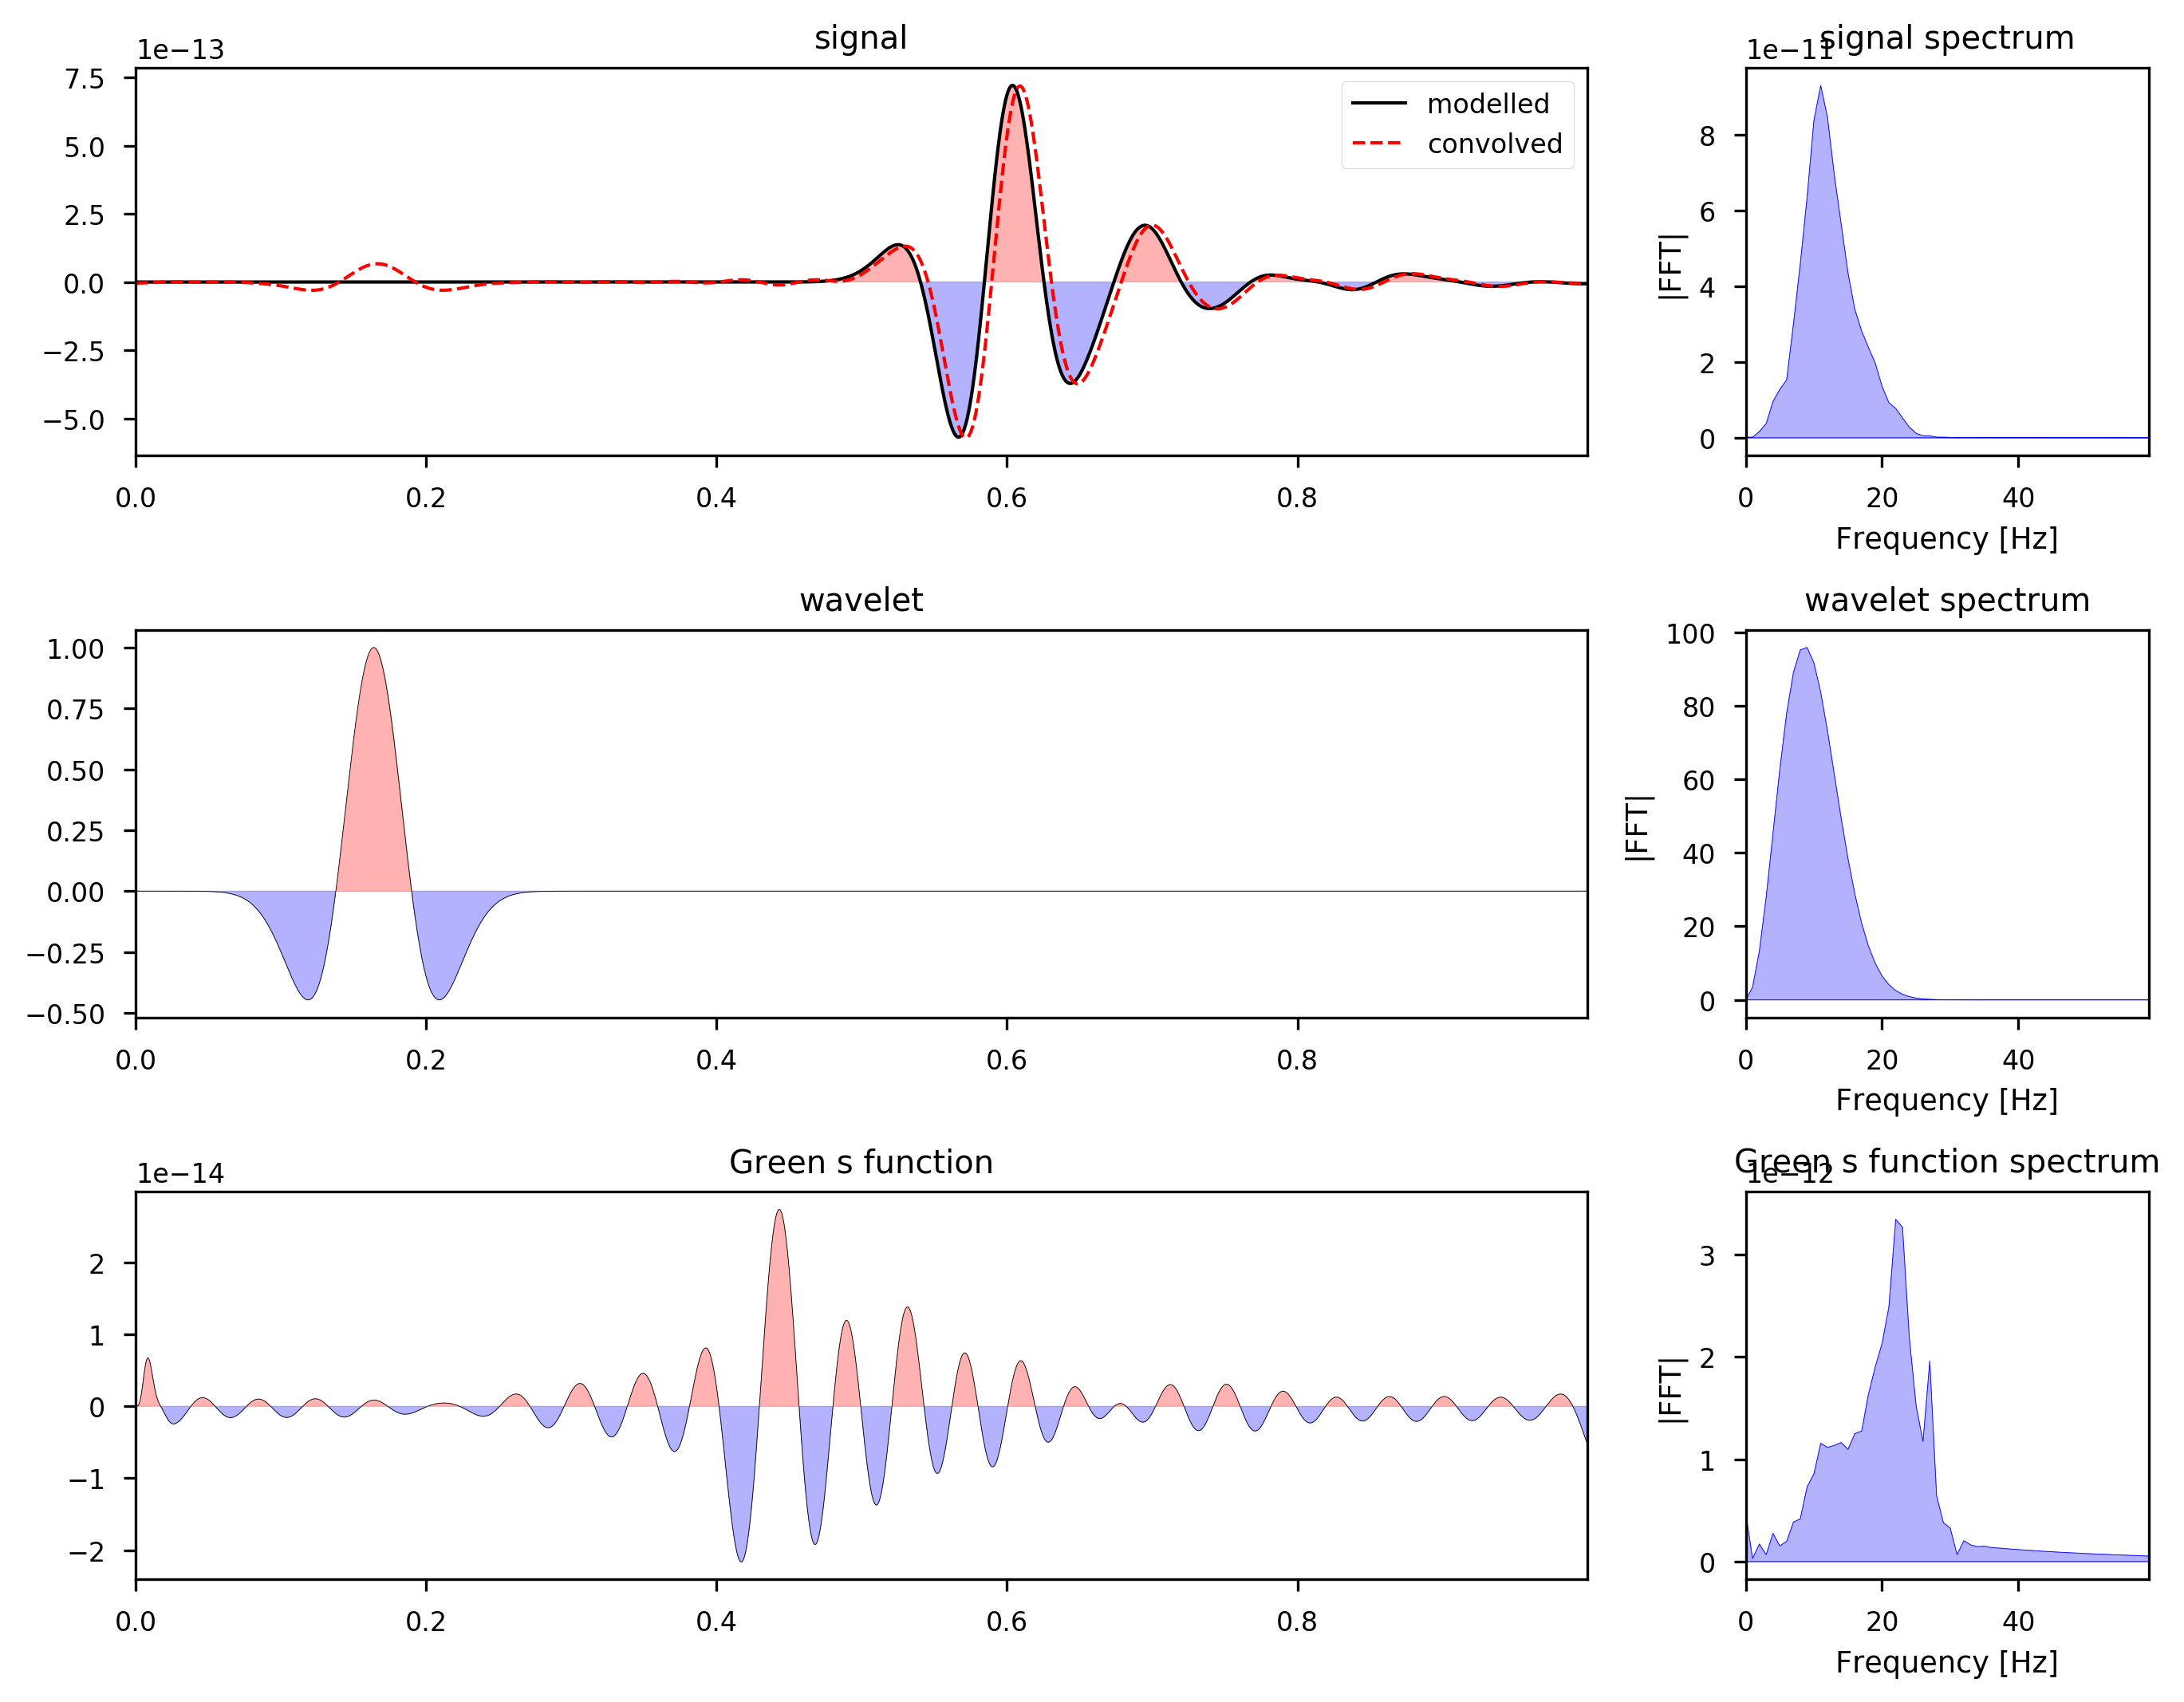

<Figure size 432x288 with 0 Axes>

In [54]:
#deconvolve data call module 'data'
wavelet     = s
timesample  = t
freqsamp    = 1/dt
datatodecon = vxx
cutofftaper = 100
ordertaper  = 5
waveletfc   = 9.15

dataprep = data(freqsamp,wavelet,timesample)
decon = dataprep.deconv(datatodecon,cutofftaper,ordertaper,waveletfc,plotdeconv=True)
